In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import  AgglomerativeClustering, KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [107]:

crime_data=pd.read_csv('crime_data.csv')

In [108]:

crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [109]:

crime_data.rename({'Unnamed: 0': 'states'},axis=1, inplace= True)

In [110]:

crime_data.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [111]:

crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   states    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [112]:

crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [113]:

crime_data.isna().sum()

states      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [114]:
crime_data.shape

(50, 5)

In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in crime_data.columns:
    if crime_data[col].dtype == 'object':
        crime_data[col] = le.fit_transform(crime_data[col])


In [116]:

crime_data.corr()

,states,Murder,Assault,UrbanPop,Rape
states,1.000000,-0.214458,-0.307237,-0.169887,-0.305142
Murder,-0.214458,1.000000,0.801873,0.069573,0.563579
Assault,-0.307237,0.801873,1.000000,0.258872,0.665241
UrbanPop,-0.169887,0.069573,0.258872,1.000000,0.411341
Rape,-0.305142,0.563579,0.665241,0.411341,1.000000


In [117]:
# Analyze the feature by creating the histogram to understand the distribution

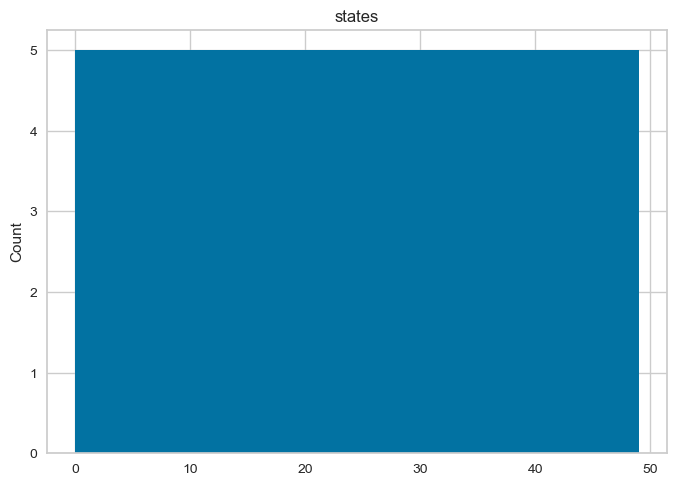

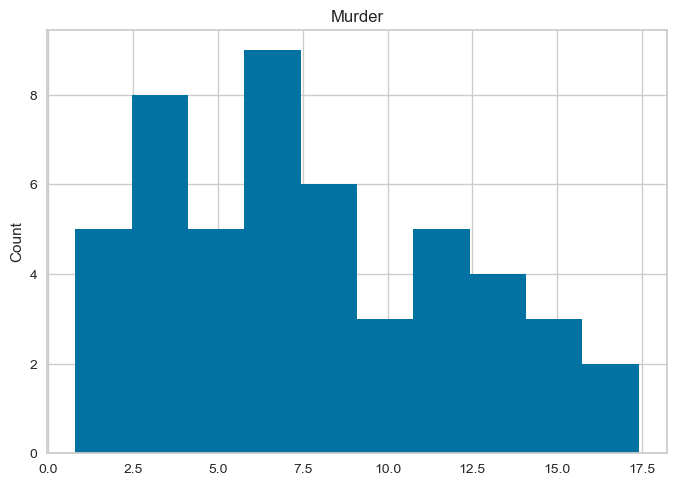

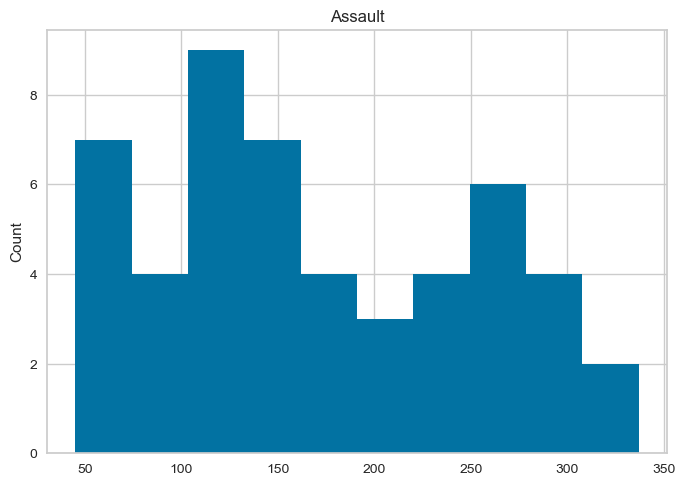

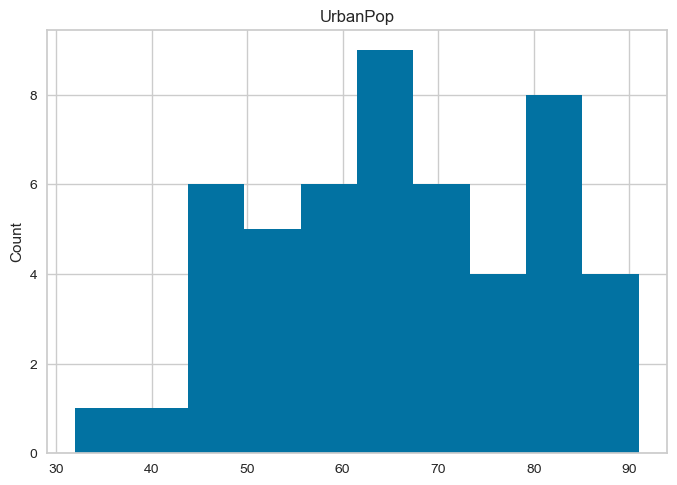

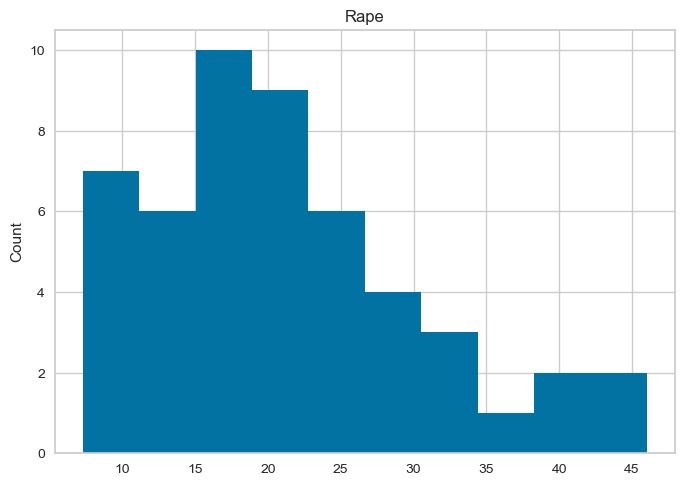

In [118]:
continuous_feature =[feature for feature in crime_data.columns if crime_data[feature].dtype != 'O']
for feature in continuous_feature :
  crime_data1=crime_data.copy()
  crime_data1[feature].hist(bins=10)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()


In [119]:
# Kernel Density for every function

states


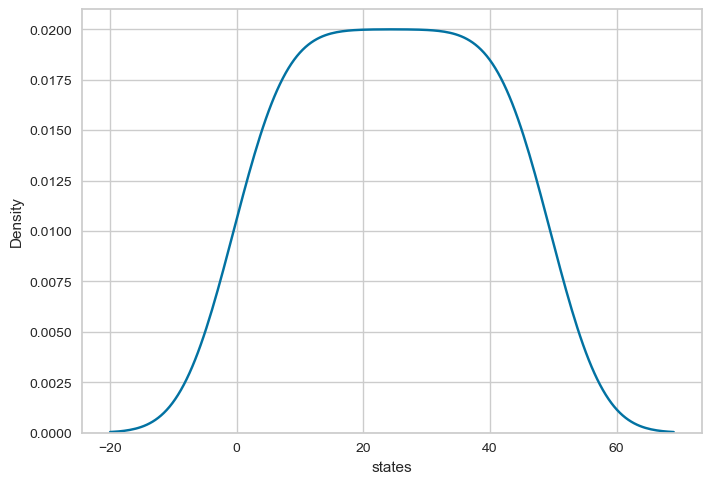

Murder


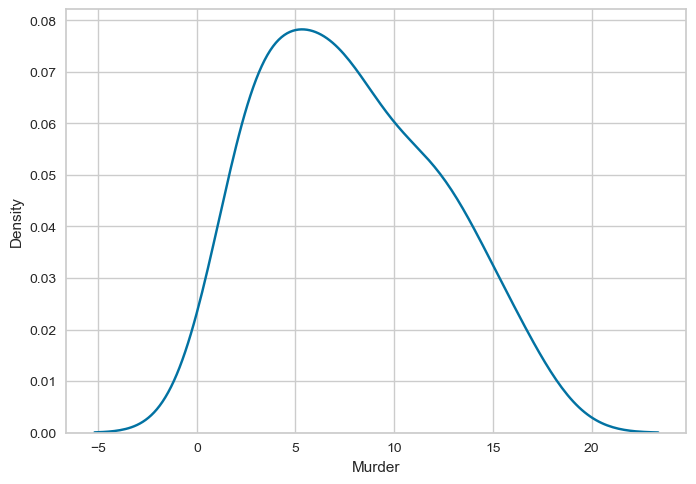

Assault


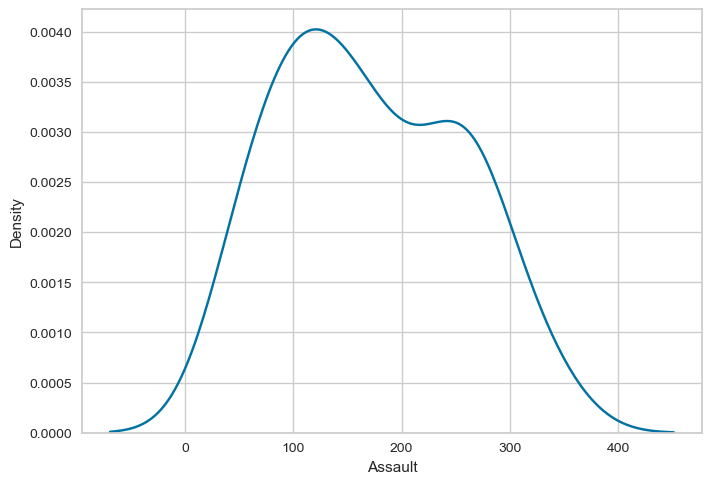

UrbanPop


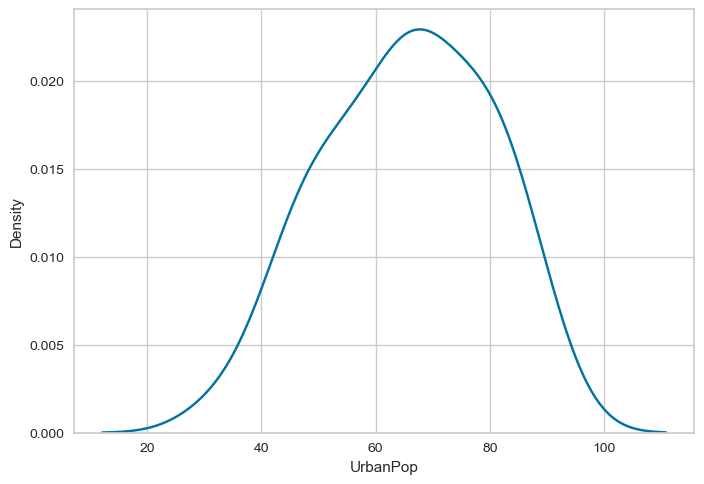

Rape


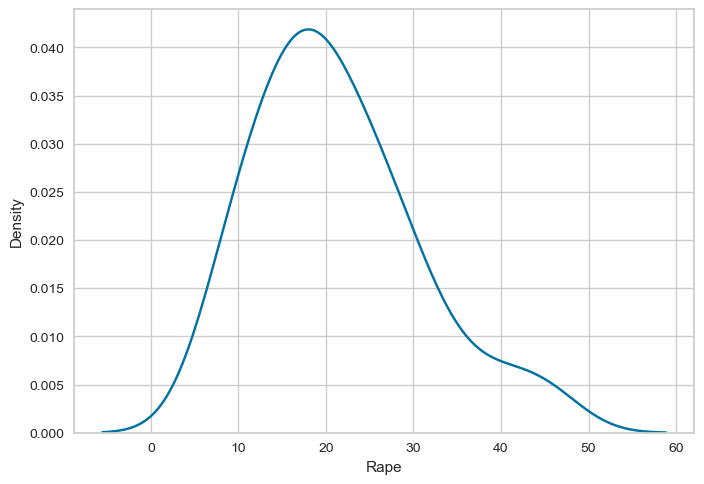

In [120]:
for n in continuous_feature:
  print(n)
  sns.kdeplot(crime_data[n])
  plt.show()
     

In [121]:
# Outlier Detection

In [122]:
crime_data.columns

Index(['states', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

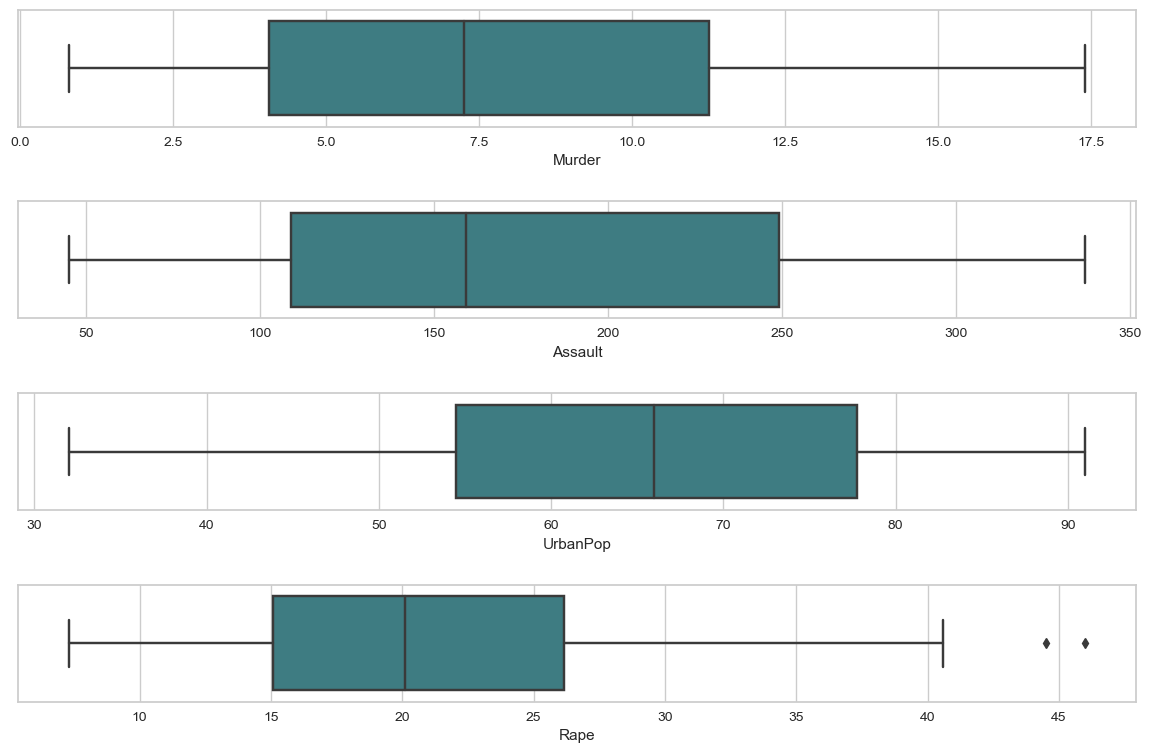

In [123]:
outliers=crime_data.copy()
fig,axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=outliers,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=outliers,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=outliers,palette='crest',ax=axes[2])                                                 
sns.boxplot(x='Rape',data=outliers,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

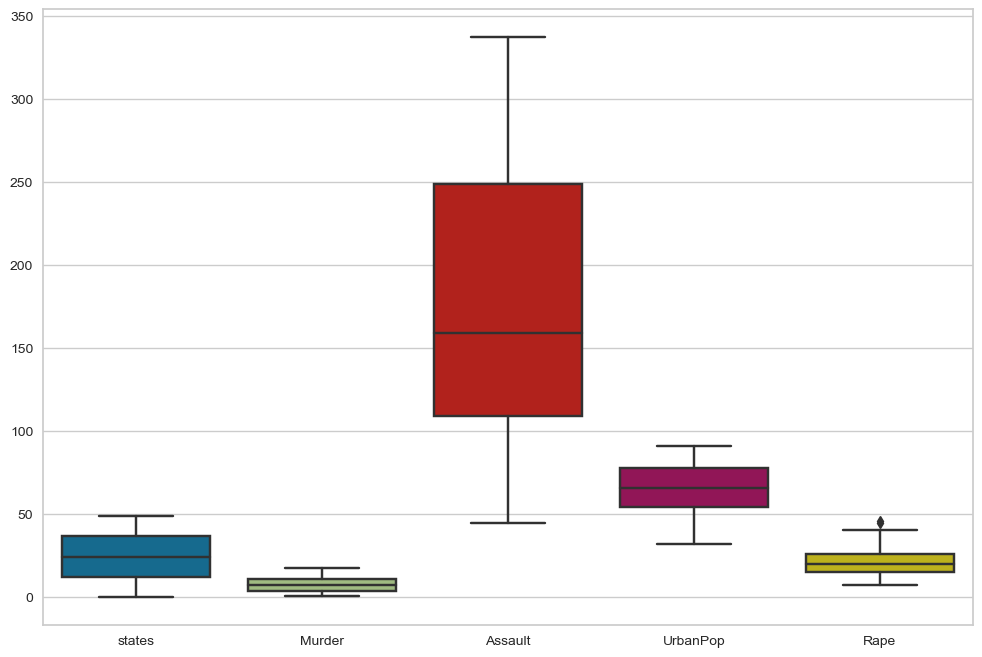

In [124]:

# Box plot for every feature in the same graph
plt.figure(figsize=(12,8))
sns.boxplot(crime_data)
plt.show()

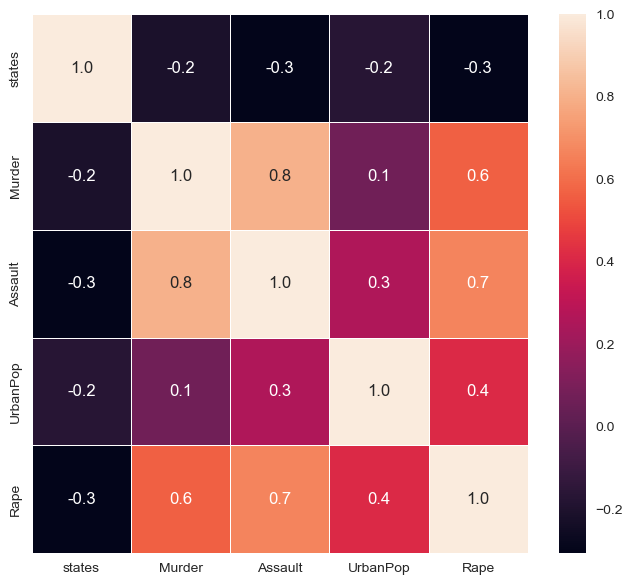

In [125]:
# Corelation Heatmap
f,ax=plt.subplots(figsize=(8,7))
sns.heatmap(crime_data.corr(),annot=True,linewidths= 0.5 ,fmt='.1f',ax=ax)
plt.show()

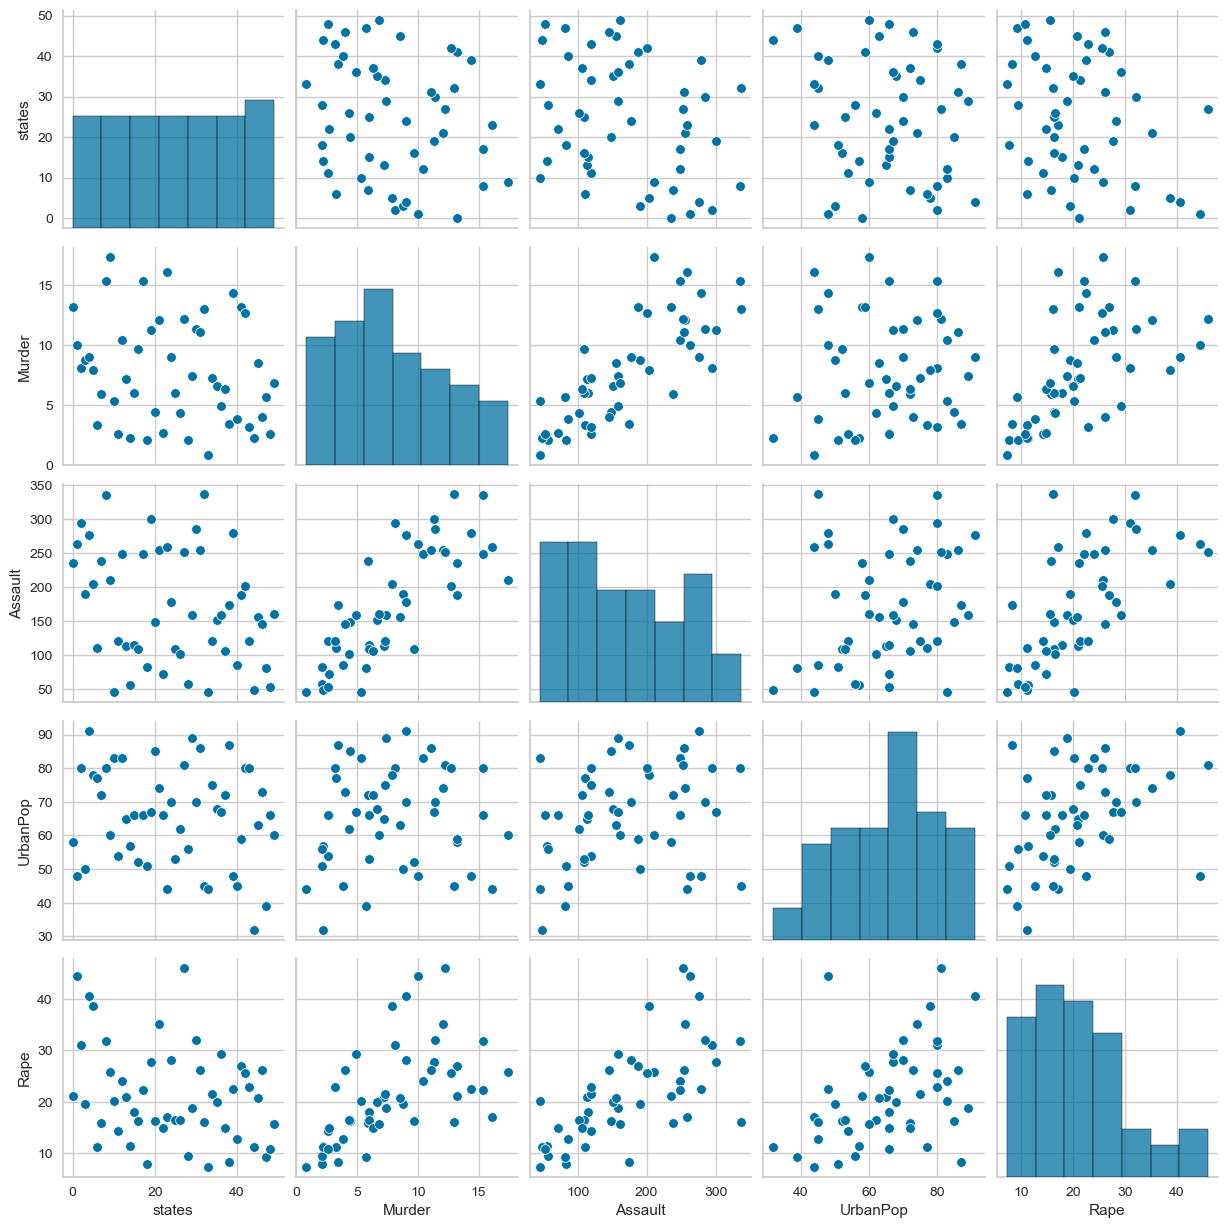

In [126]:

sns.pairplot(crime_data)
plt.show()

In [127]:
# Murder Rate

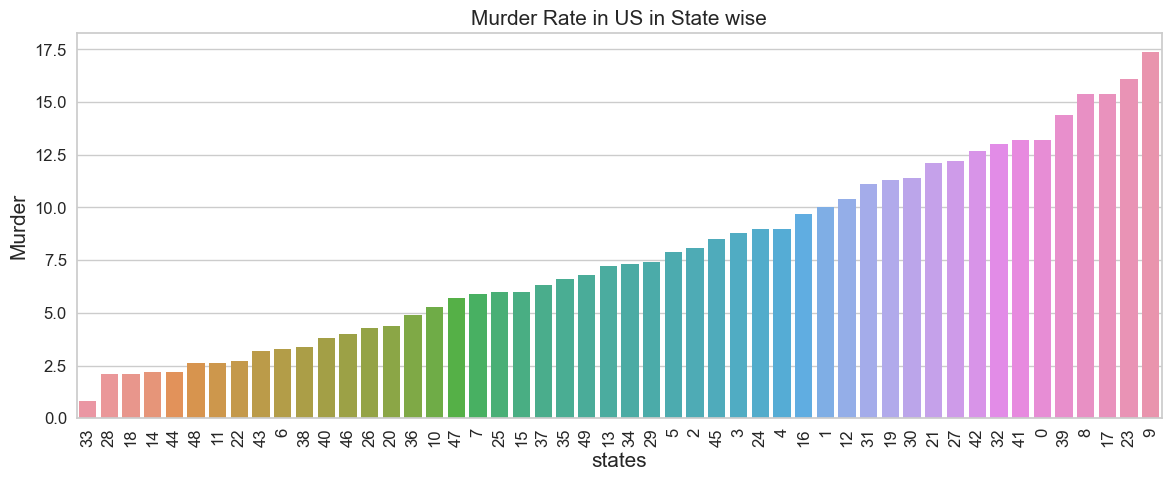

In [128]:
plt.figure(figsize=(14,5))
sns.barplot(x='states', y="Murder", data=crime_data, order=crime_data.sort_values('Murder').states)
# set labels
plt.xlabel('states',size=15)
plt.ylabel('Murder',size=15)
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.title("Murder Rate in US in State wise",size=15)
plt.show()

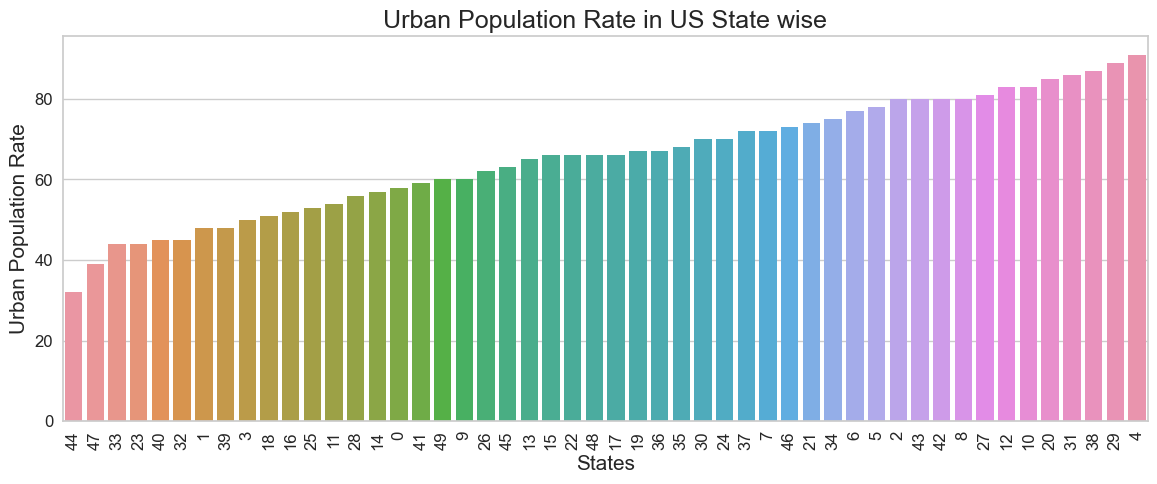

In [129]:
plt.figure(figsize=(14,5))
# make barplot and sort bars
sns.barplot(x='states', y="UrbanPop", data=crime_data, order=crime_data.sort_values('UrbanPop').states)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [130]:
high_murder = crime_data.sort_values('Murder', ascending = False, ignore_index=True)
high_murder.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,9,17.4,211,60,25.8
1,23,16.1,259,44,17.1
2,8,15.4,335,80,31.9
3,17,15.4,249,66,22.2
4,39,14.4,279,48,22.5
5,0,13.2,236,58,21.2
6,41,13.2,188,59,26.9
7,32,13.0,337,45,16.1
8,42,12.7,201,80,25.5
9,27,12.2,252,81,46.0


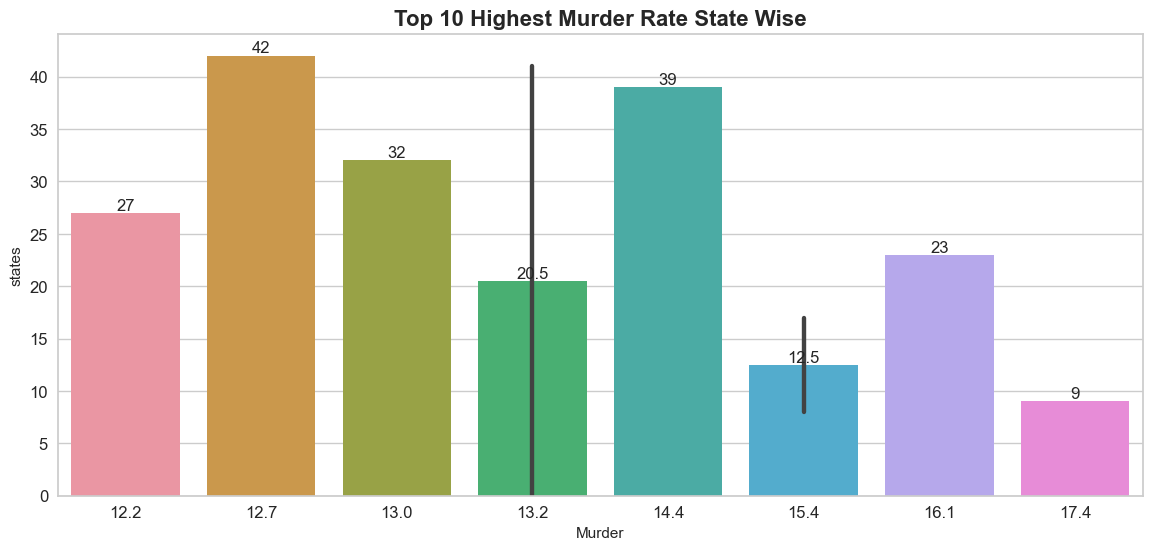

In [131]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_murder.Murder[:10], y = high_murder.states[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)
     

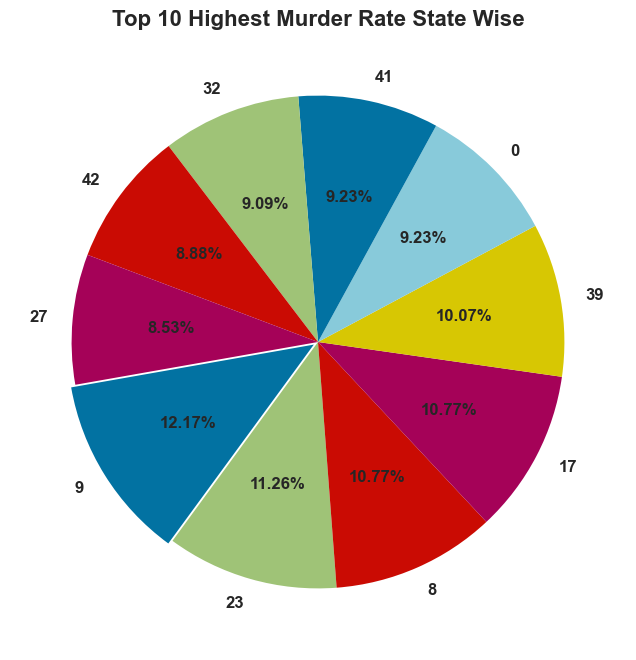

In [132]:

plt.figure(figsize = (8,8))
plt.pie(high_murder.Murder[:10], labels= high_murder.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [133]:
low_murder = crime_data.sort_values('Murder', ascending = True, ignore_index=True)
low_murder.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,33,0.8,45,44,7.3
1,28,2.1,57,56,9.5
2,18,2.1,83,51,7.8
3,14,2.2,56,57,11.3
4,44,2.2,48,32,11.2
5,48,2.6,53,66,10.8
6,11,2.6,120,54,14.2
7,22,2.7,72,66,14.9
8,43,3.2,120,80,22.9
9,6,3.3,110,77,11.1


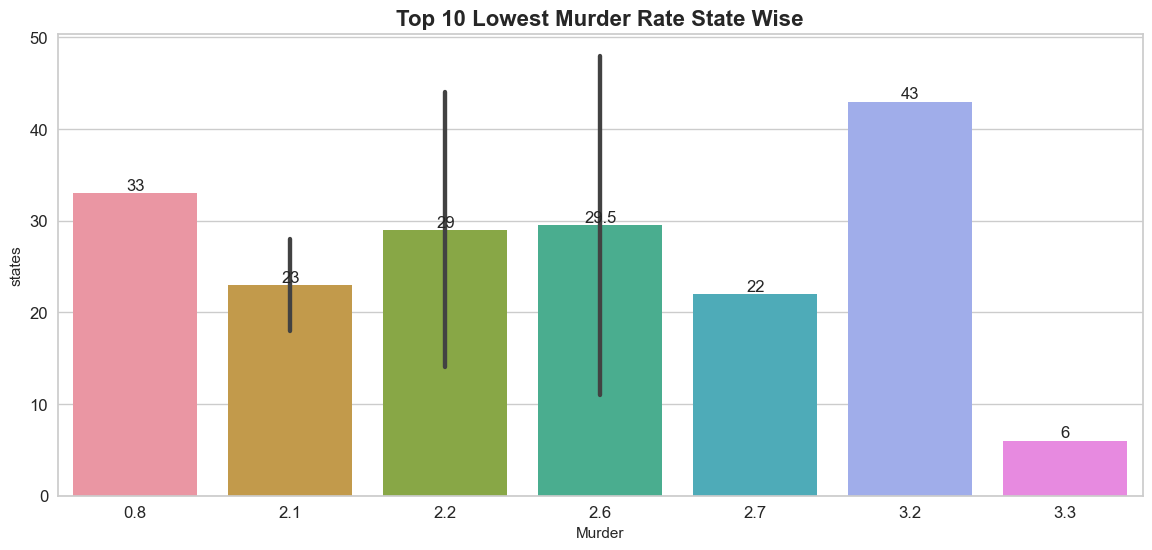

In [134]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_murder.Murder[:10], y = low_murder.states[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

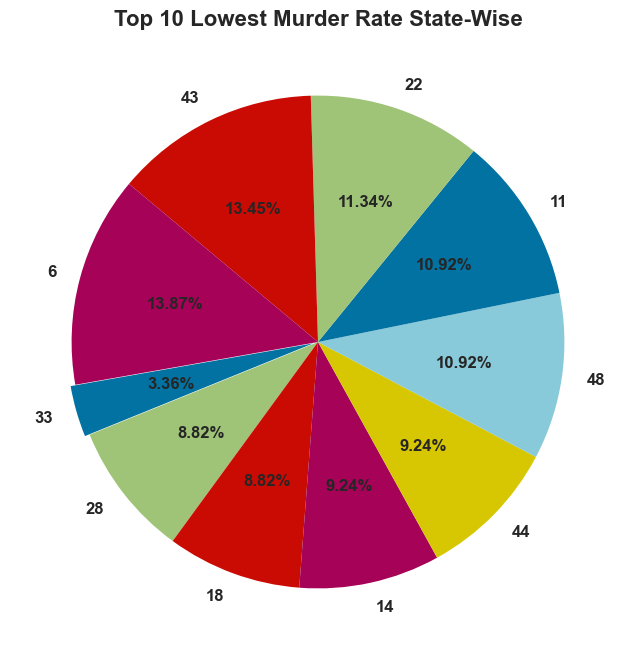

In [135]:
plt.figure(figsize = (8,8))
plt.pie(low_murder.Murder[:10], labels= low_murder.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold',})

plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 16, fontweight = 'bold')
plt.show()
     

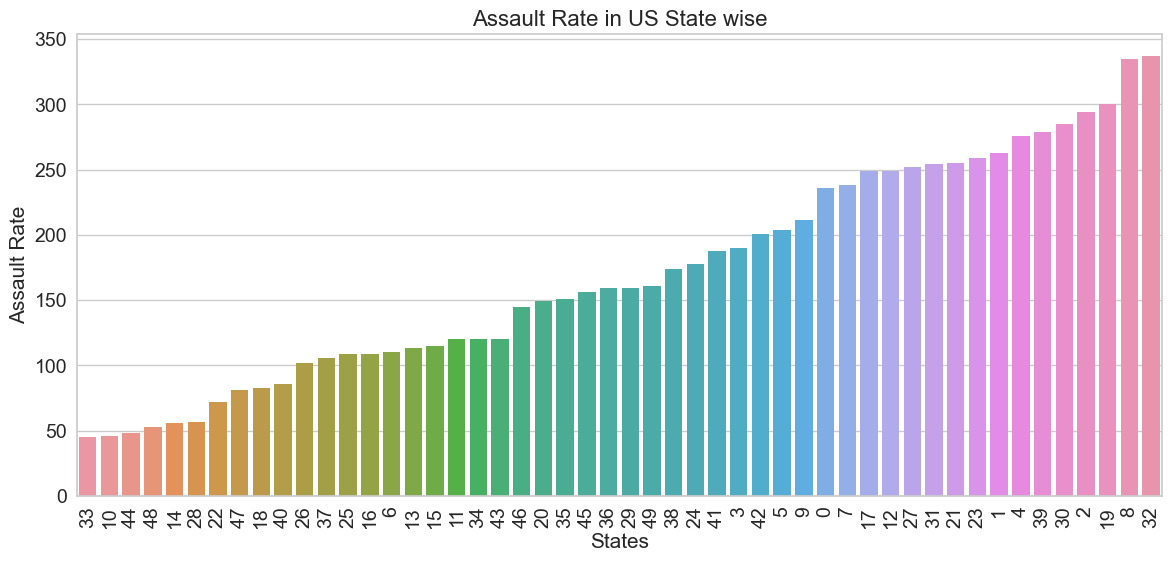

In [136]:

#Assault Rate
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='states', y="Assault", data=crime_data, order=crime_data.sort_values('Assault').states)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Assault Rate in US State wise", size=16)
plt.show()

In [137]:
high_assault = crime_data.sort_values('Assault', ascending = False, ignore_index=True)
high_assault.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,32,13.0,337,45,16.1
1,8,15.4,335,80,31.9
2,19,11.3,300,67,27.8
3,2,8.1,294,80,31.0
4,30,11.4,285,70,32.1
5,39,14.4,279,48,22.5
6,4,9.0,276,91,40.6
7,1,10.0,263,48,44.5
8,23,16.1,259,44,17.1
9,21,12.1,255,74,35.1


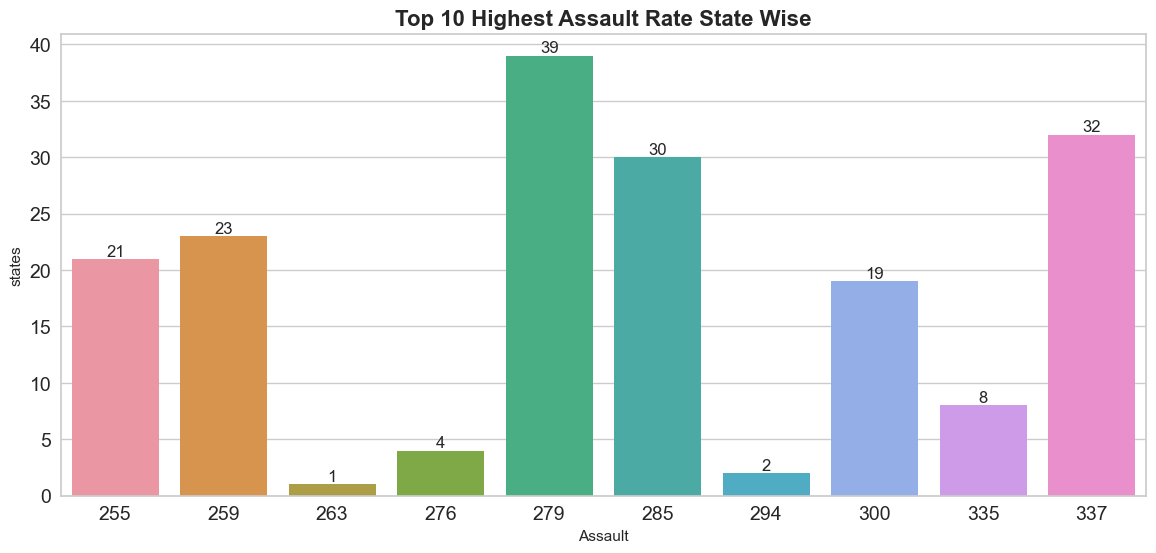

In [138]:

plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_assault.Assault[:10], y = high_assault.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

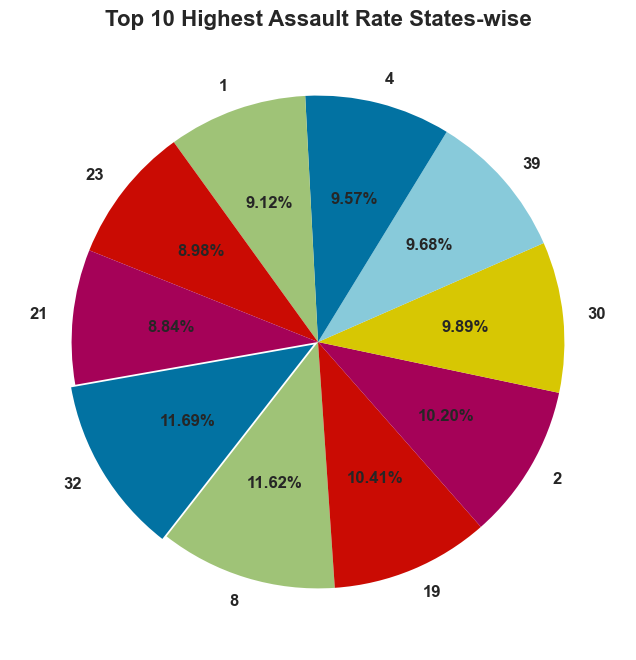

In [139]:

plt.figure(figsize = (8,8))
plt.pie(high_assault.Assault[:10], labels=high_assault.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [140]:

low_assault = crime_data.sort_values('Assault', ascending = True, ignore_index= True)
low_assault.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,33,0.8,45,44,7.3
1,10,5.3,46,83,20.2
2,44,2.2,48,32,11.2
3,48,2.6,53,66,10.8
4,14,2.2,56,57,11.3
5,28,2.1,57,56,9.5
6,22,2.7,72,66,14.9
7,47,5.7,81,39,9.3
8,18,2.1,83,51,7.8
9,40,3.8,86,45,12.8


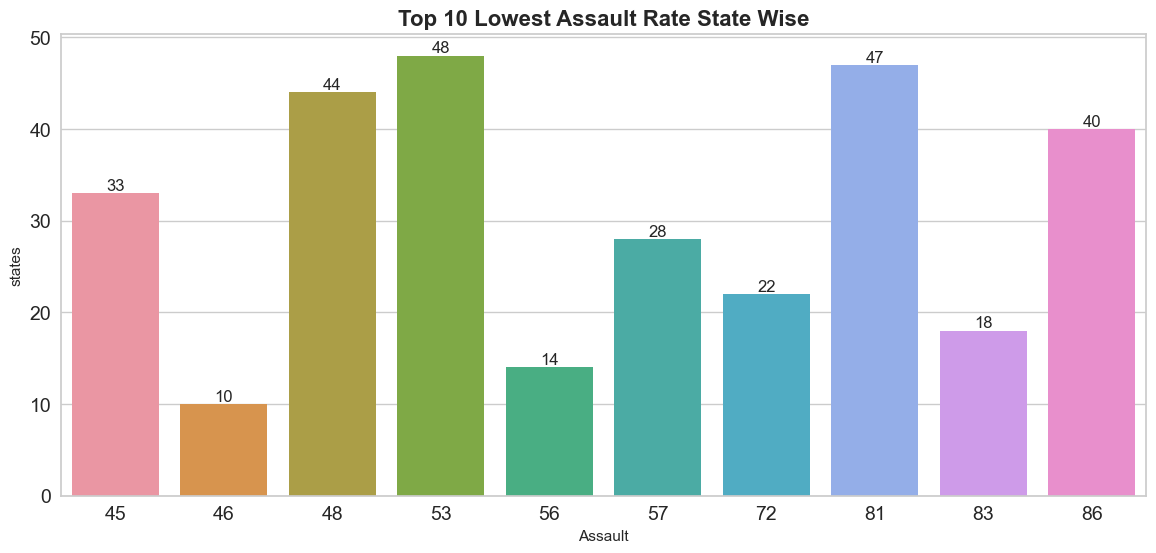

In [141]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_assault.Assault[:10], y = low_assault.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

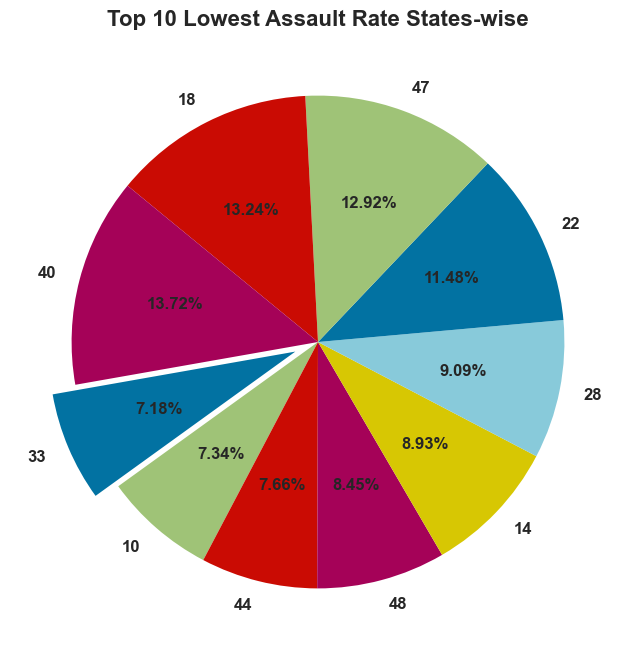

In [142]:
plt.figure(figsize = (8,8))
plt.pie(low_assault.Assault[:10], labels= low_assault.states[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()
     

In [143]:
# Rape Rate

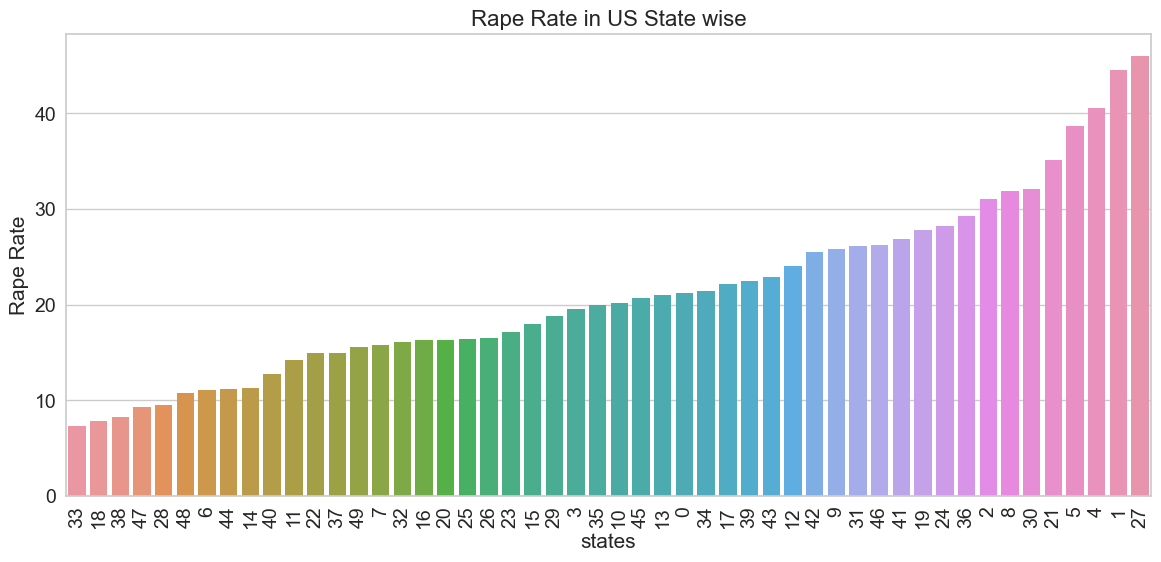

In [144]:
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='states', y="Rape", data=crime_data, order=crime_data.sort_values('Rape').states)

# set labels
plt.xlabel("states", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Rape Rate in US State wise", size=16)
plt.show()

In [145]:

high_rape = crime_data.sort_values('Rape', ascending=False, ignore_index=True)
high_rape.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,27,12.2,252,81,46.0
1,1,10.0,263,48,44.5
2,4,9.0,276,91,40.6
3,5,7.9,204,78,38.7
4,21,12.1,255,74,35.1
5,30,11.4,285,70,32.1
6,8,15.4,335,80,31.9
7,2,8.1,294,80,31.0
8,36,4.9,159,67,29.3
9,24,9.0,178,70,28.2


In [146]:
low_rape = crime_data.sort_values('Rape', ascending=True, ignore_index=True)
low_rape.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,33,0.8,45,44,7.3
1,18,2.1,83,51,7.8
2,38,3.4,174,87,8.3
3,47,5.7,81,39,9.3
4,28,2.1,57,56,9.5
5,48,2.6,53,66,10.8
6,6,3.3,110,77,11.1
7,44,2.2,48,32,11.2
8,14,2.2,56,57,11.3
9,40,3.8,86,45,12.8


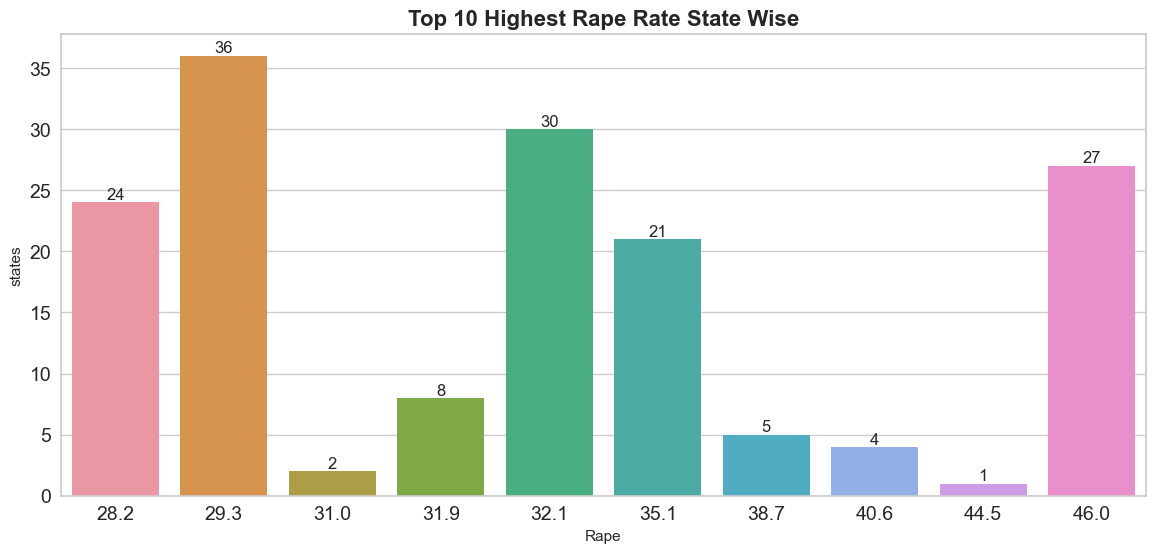

In [147]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_rape.Rape[:10], y =high_rape.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

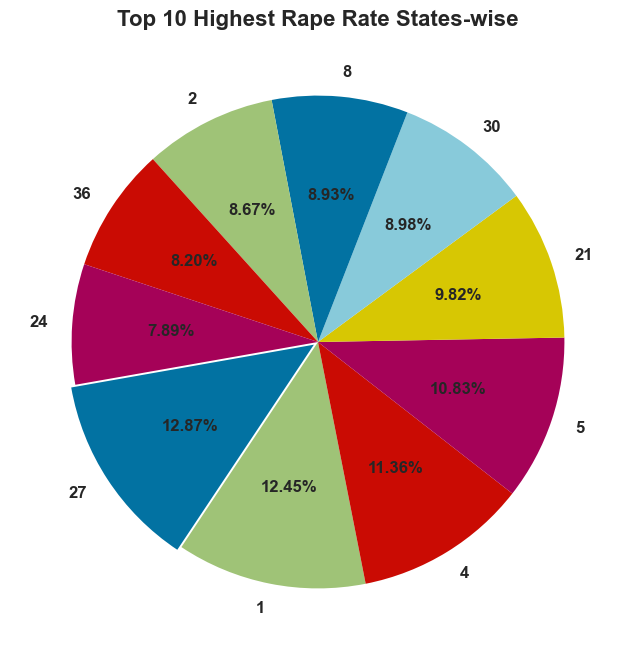

In [148]:
plt.figure(figsize = (8,8))
plt.pie(high_rape.Rape[:10], labels= high_rape.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium',
                   'fontweight':'bold'})

plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

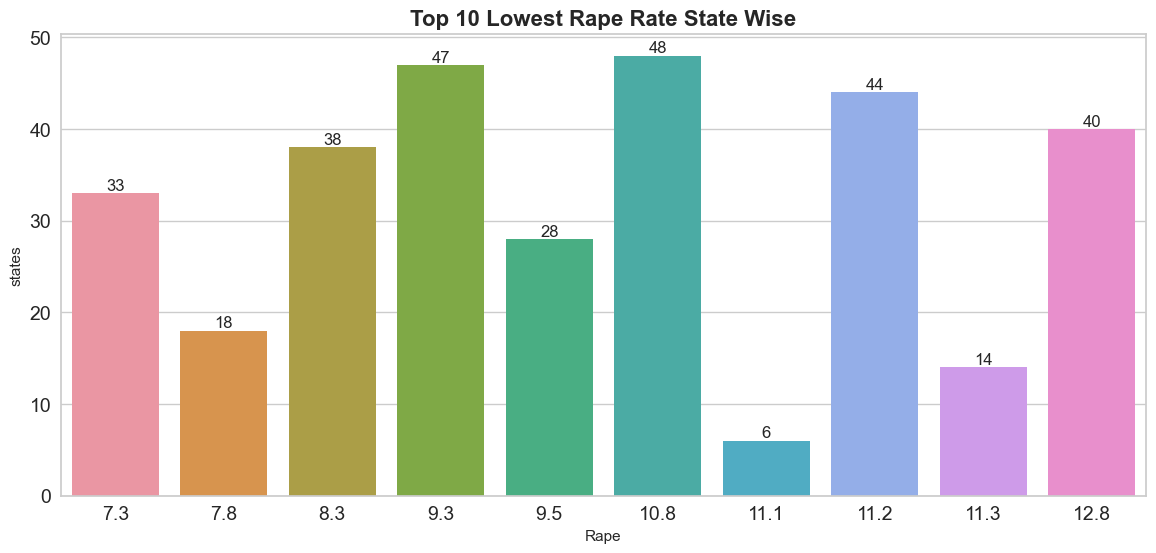

In [149]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_rape.Rape[:10], y = low_rape.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

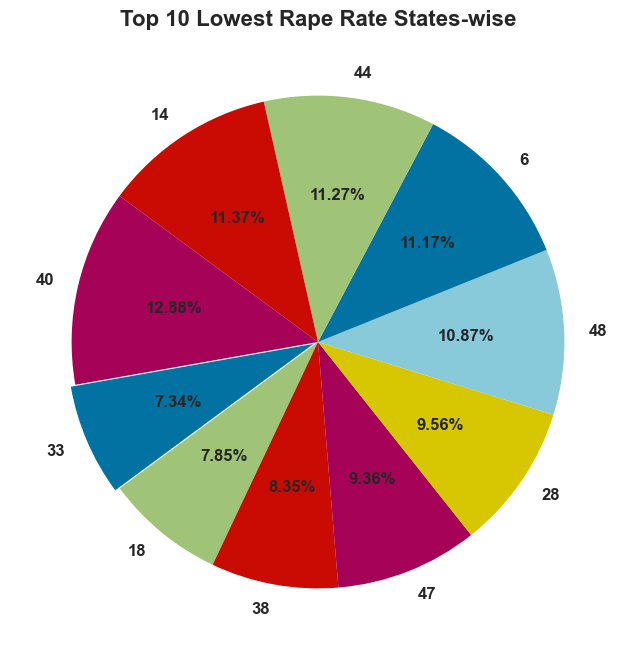

In [150]:
plt.figure(figsize = (8,8))
plt.pie(low_rape.Rape[:10], labels= low_rape.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [151]:
# Urban Population Rate

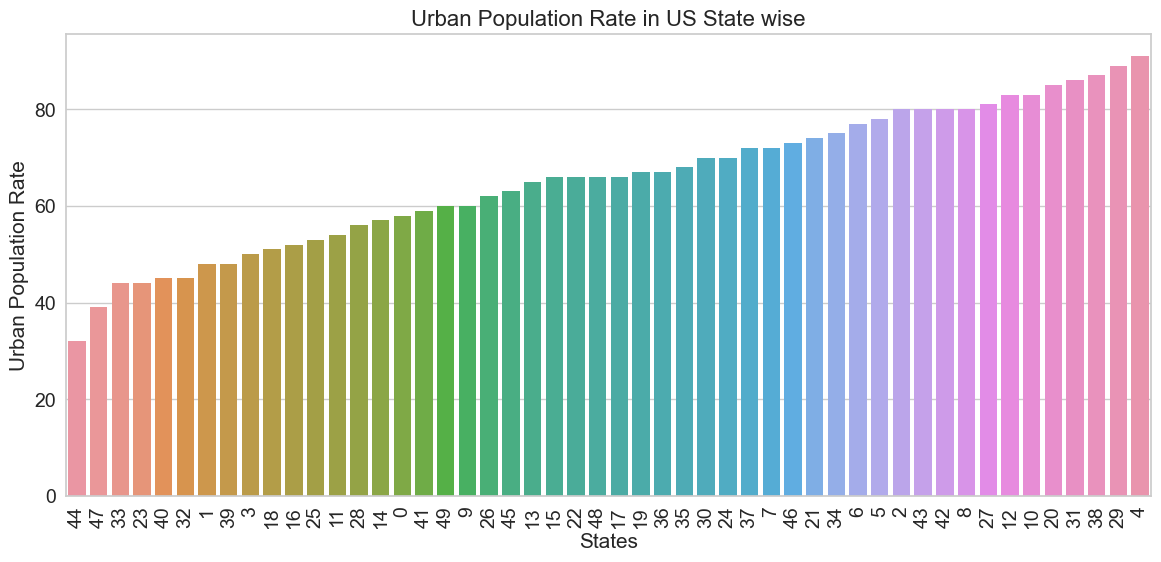

In [152]:
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='states', y="UrbanPop", data=crime_data, order=crime_data.sort_values('UrbanPop').states)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US State wise", size=16)
plt.show()

In [153]:
high_population = crime_data.sort_values('UrbanPop',ascending=False, ignore_index=True)
high_population.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,4,9.0,276,91,40.6
1,29,7.4,159,89,18.8
2,38,3.4,174,87,8.3
3,31,11.1,254,86,26.1
4,20,4.4,149,85,16.3
5,10,5.3,46,83,20.2
6,12,10.4,249,83,24.0
7,27,12.2,252,81,46.0
8,42,12.7,201,80,25.5
9,2,8.1,294,80,31.0


In [154]:
low_population = crime_data.sort_values('UrbanPop',ascending=True, ignore_index=True)
low_population.head(10)
     

,states,Murder,Assault,UrbanPop,Rape
0,44,2.2,48,32,11.2
1,47,5.7,81,39,9.3
2,33,0.8,45,44,7.3
3,23,16.1,259,44,17.1
4,40,3.8,86,45,12.8
5,32,13.0,337,45,16.1
6,1,10.0,263,48,44.5
7,39,14.4,279,48,22.5
8,3,8.8,190,50,19.5
9,18,2.1,83,51,7.8


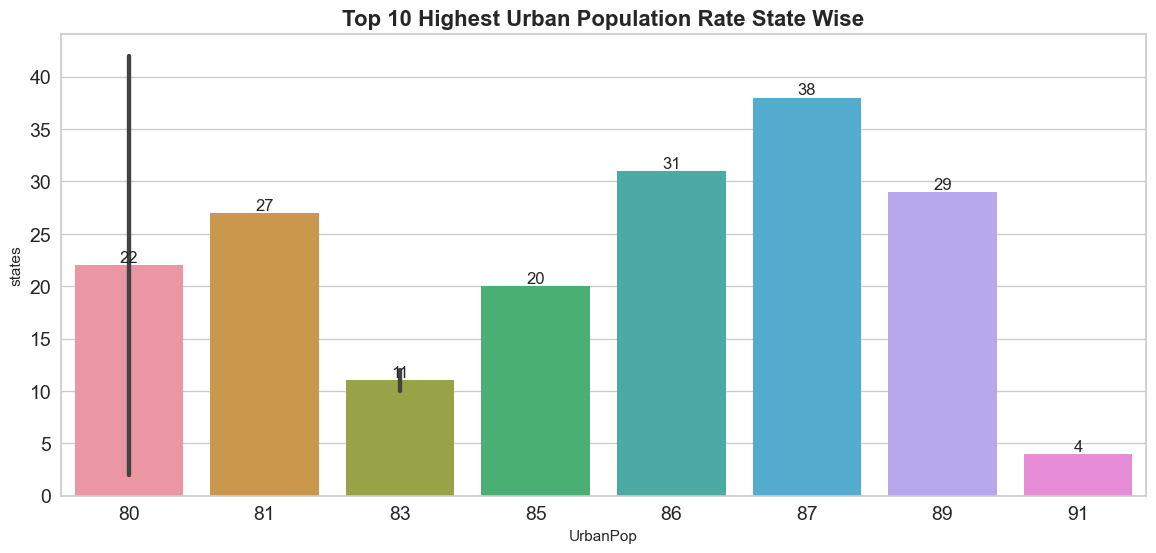

In [155]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_population.UrbanPop[:10], y = high_population.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

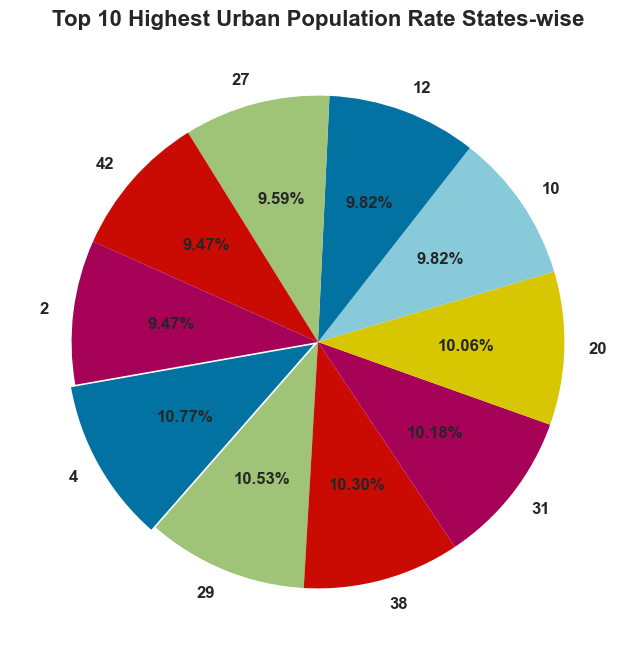

In [156]:
plt.figure(figsize = (8,8))
plt.pie(high_population.UrbanPop[:10], labels= high_population.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show() 

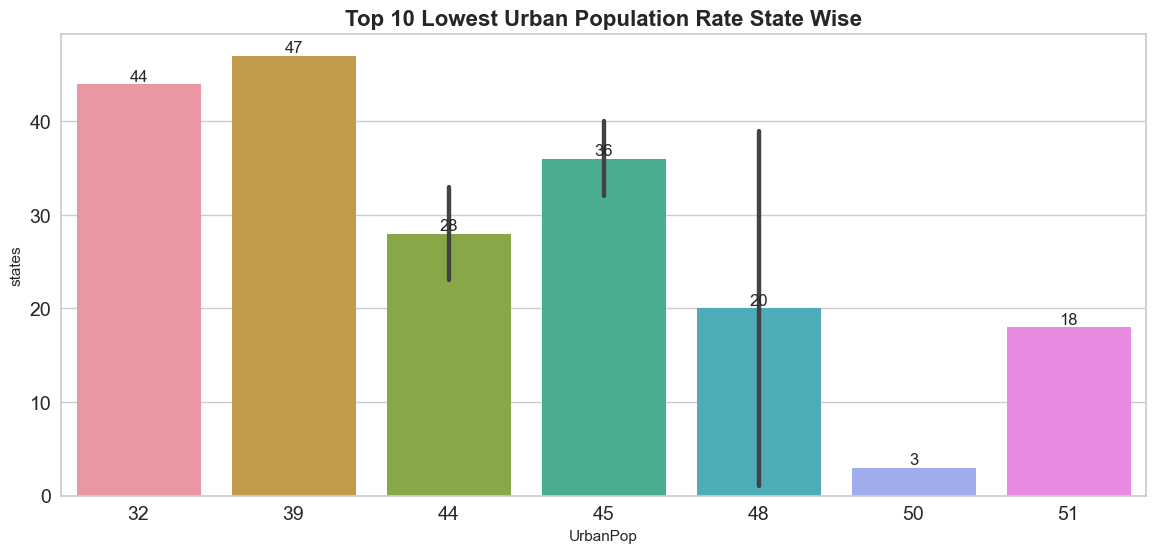

In [157]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_population.UrbanPop[:10], y = low_population.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

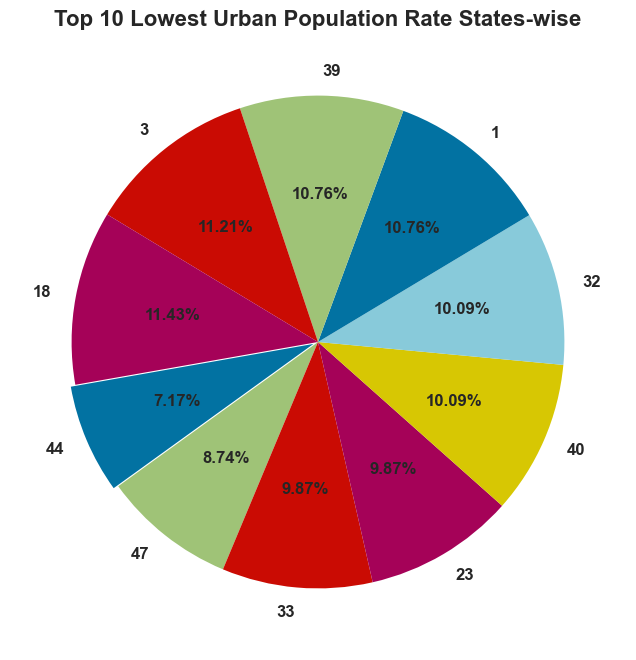

In [158]:
plt.figure(figsize = (8,8))
plt.pie(low_population.UrbanPop[:10], labels= low_population.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [159]:
# Data Processing

In [160]:
crime_df = crime_data.set_index('states')
crime_df.head()

,Murder,Assault,UrbanPop,Rape
states,,,,
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [161]:
standard_scaler = StandardScaler()
std_crime = standard_scaler.fit_transform(crime_df)
std_crime.shape

(50, 4)

In [162]:
# Normalizing the data
minmax = MinMaxScaler()
norm_crime = minmax.fit_transform(crime_df)
norm_crime.shape

(50, 4)

In [163]:
# K-Means Clustering
# Elbow Method for Determining Cluster Amount

In [164]:
# Standard Scaler Applied on Data
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_crime)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df
     

,Num_Clusters,Cluster_Errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,49.993843
5,6,44.198835
6,7,41.494086
7,8,34.696907
8,9,32.088960
9,10,28.294300


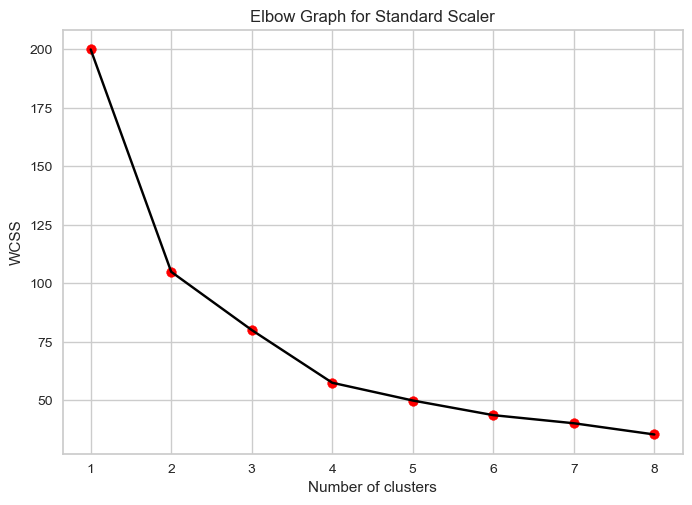

In [165]:
# Within-Cluster Sum-of-Squares Criterion 
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_crime)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
     

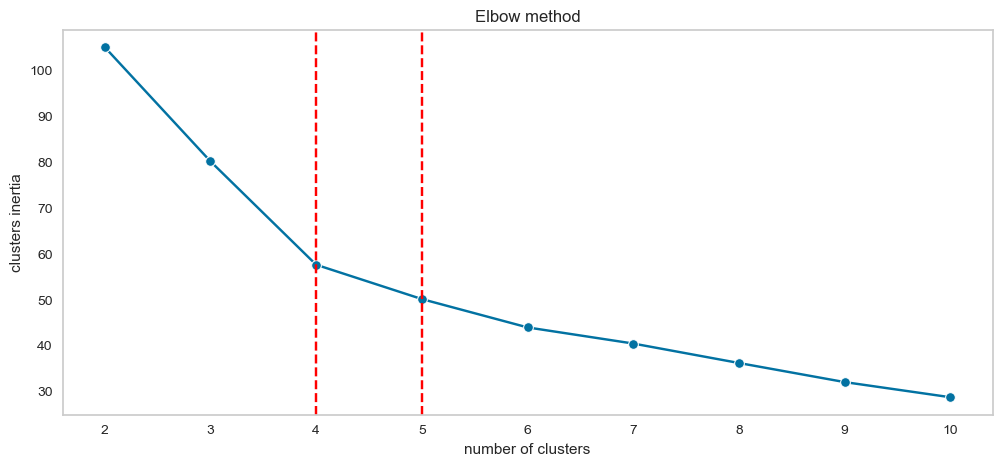

In [166]:
#from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_crime)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_crime, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters,y= clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()
     

Elbow Plot for MinMaxScaler data


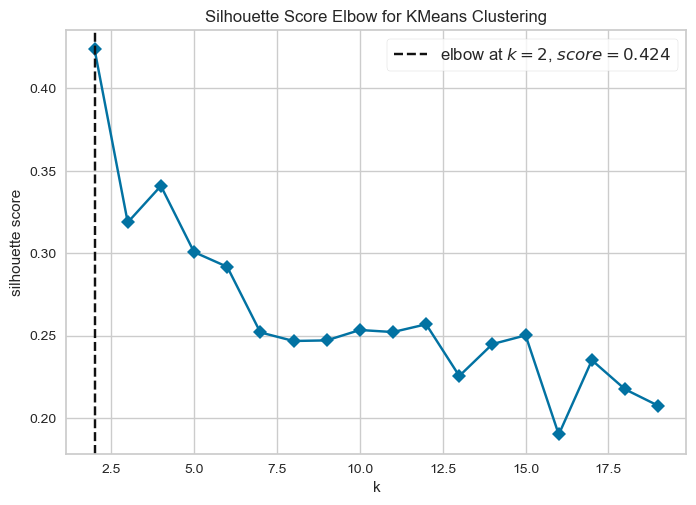

In [167]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(norm_crime)    
visualizer.poof()
plt.show()
     

In [168]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(norm_crime)
    sil_score1= silhouette_score(norm_crime, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)
     

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.3018188352484066
For n_clusters = 6 The average silhouette_score is : 0.2774383012316109
For n_clusters = 7 The average silhouette_score is : 0.27068412384434465
For n_clusters = 8 The average silhouette_score is : 0.24577733094529056
For n_clusters = 9 The average silhouette_score is : 0.2574683104655026


In [169]:
# Building KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

In [170]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(norm_crime)
y_predict_kmeans.shape

(50,)

In [171]:
# these are nothing but cluster labels...
y_predict_kmeans
     

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [172]:
model_kmeans.labels_
     

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [173]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[0.68463855, 0.72003425, 0.61694915, 0.56498708],
       [0.24518072, 0.23778539, 0.53615819, 0.22334195]])

In [174]:
# Within-Cluster Sum of Squared
#The lower values of inertia are better and zero is optimal.

# Inertia is the sum of squared error for each cluster.

# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

In [175]:
model_kmeans.inertia_

6.596893867946196

In [176]:
#Assign clusters to the data set
crime_df['Kmeans_Label'] = model_kmeans.labels_

TypeError: not all arguments converted during string formatting

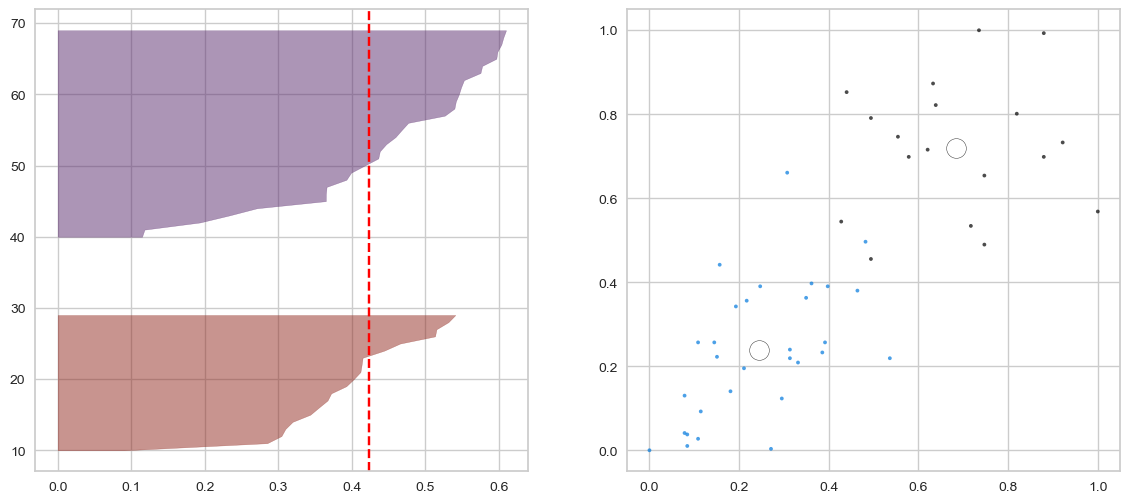

In [182]:

from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(norm_crime)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 4) # 6 is number of clusters
ax2.scatter(norm_crime[:, 0], norm_crime[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

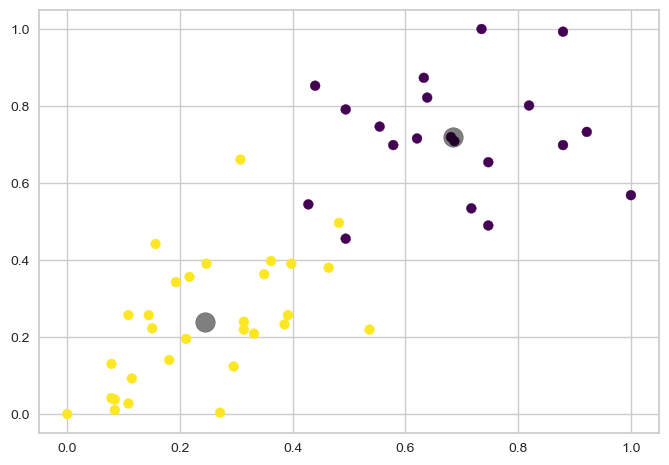

In [183]:
# Visualize the data we reduced to 2 sets.
plt.scatter(norm_crime[:,0], norm_crime[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")
centers = model_kmeans.cluster_centers_

# We want to create 2 centers and show them on the visual.
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)
plt.show()

In [184]:

# Group data by Clusters (K=6)
crime_df.groupby('Kmeans_Label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_Label,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


In [185]:
# Hierarchical Clustering Algorithm

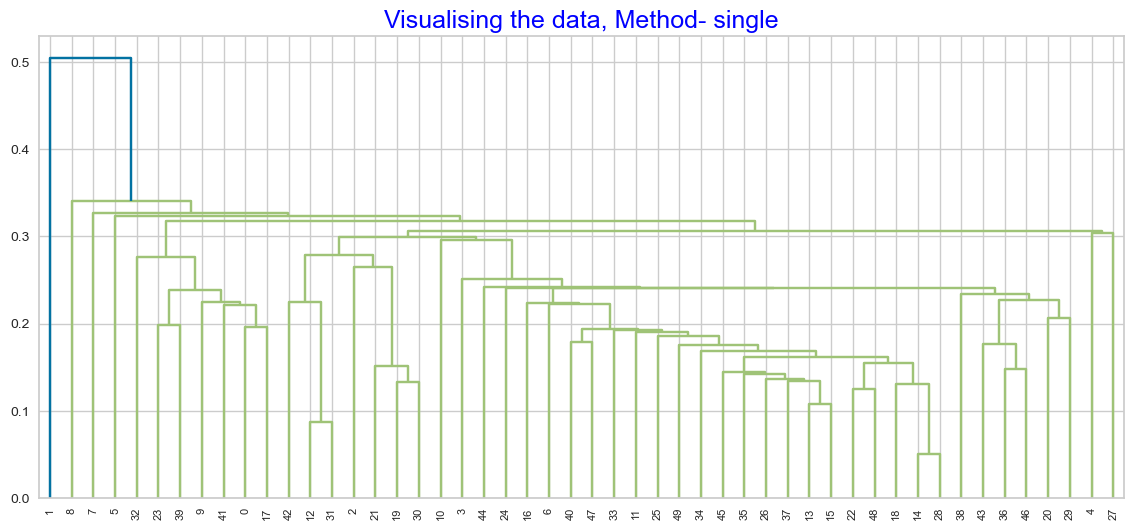

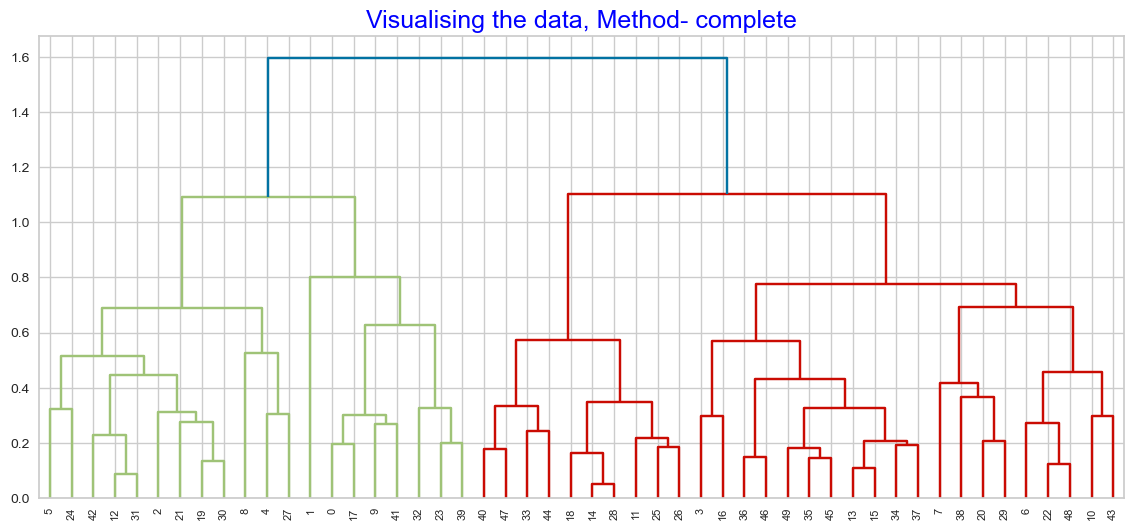

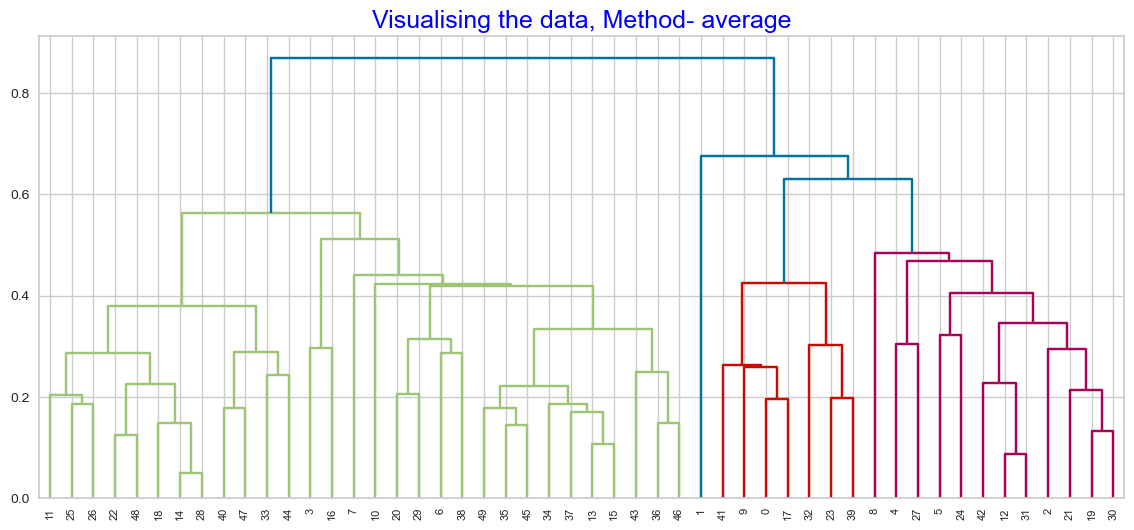

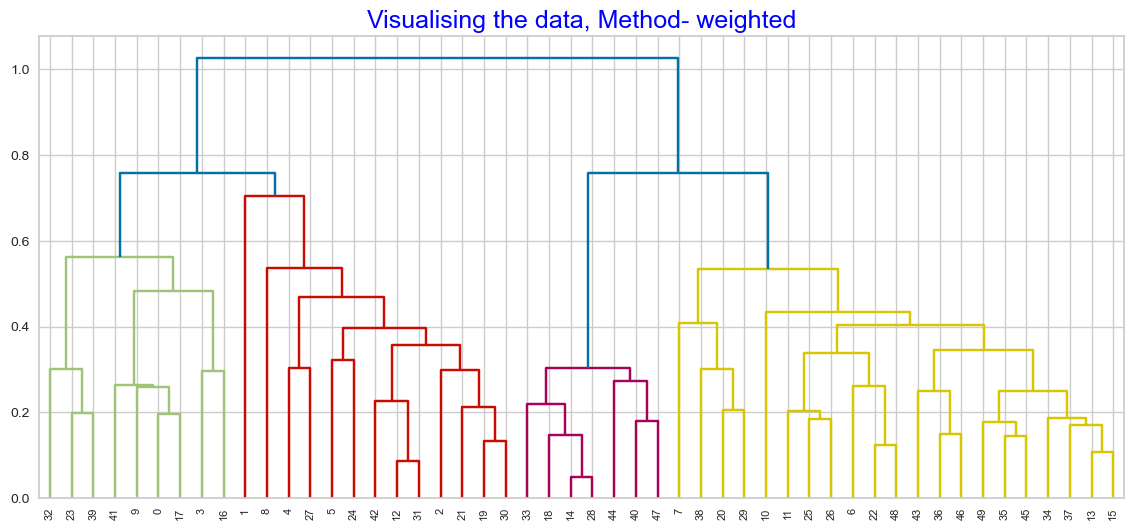

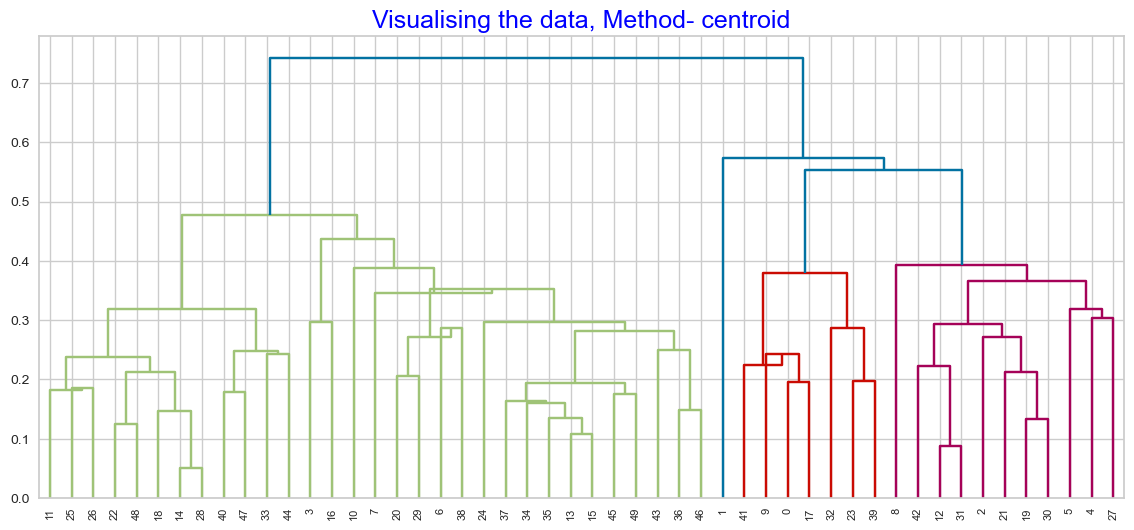

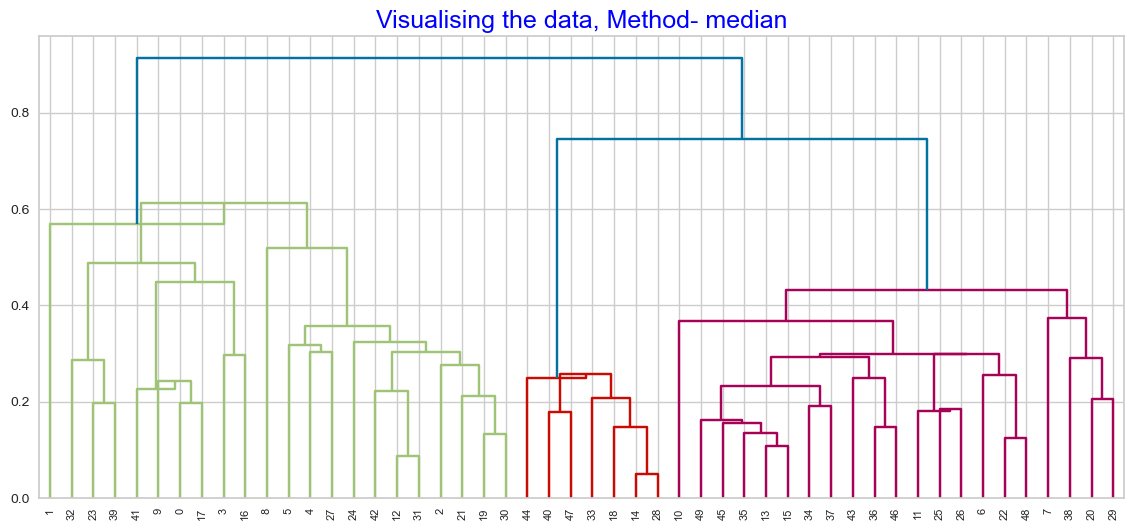

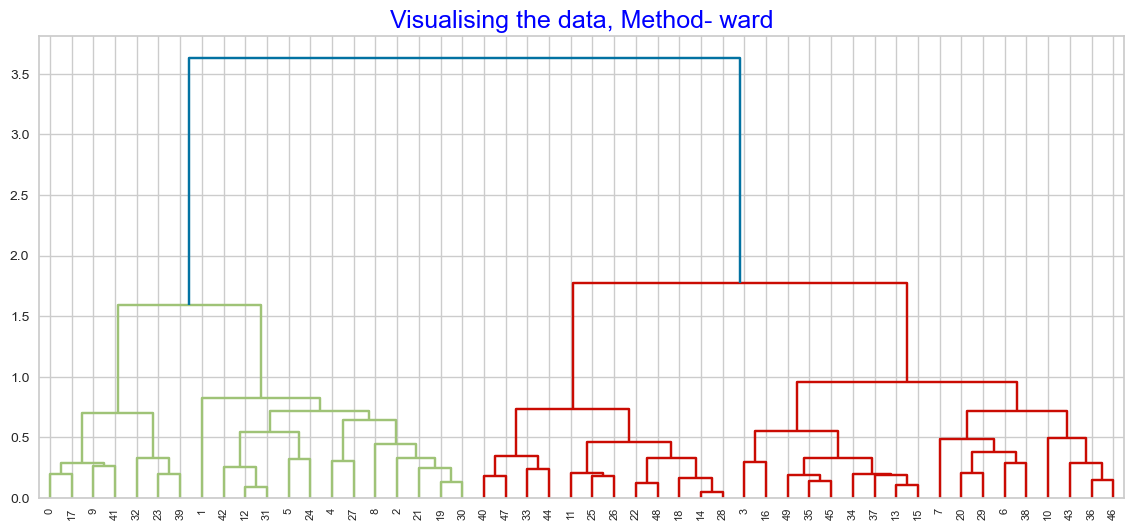

In [186]:
# Dendogram on MinMaxScaler Applied on Dataset

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))     
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}  
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_crime, method = methods,optimal_ordering=False))
     

In [187]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(std_crime)
        silhouette_score2 = silhouette_score(std_crime, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

In [188]:
# Run Hierarchical Clustering.(Agglomerative Clustering)

In [189]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(norm_crime)
print(y_pred_hie.shape)
y_pred_hie
     

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [190]:
# Cluster numbers
agg_clustering.n_clusters_

2

In [191]:
# Clustering Score
(silhouette_score(norm_crime, agg_clustering.labels_)*100).round(3)

42.364

In [192]:

# Concating Labels with main dataset copy
crime_df['Hierarchical_Labels'] = agg_clustering.labels_

In [193]:

crime_df.groupby('Hierarchical_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,
0,4.870,114.433333,63.633333,15.943333,1.0
1,12.165,255.250000,68.400000,29.165000,0.0


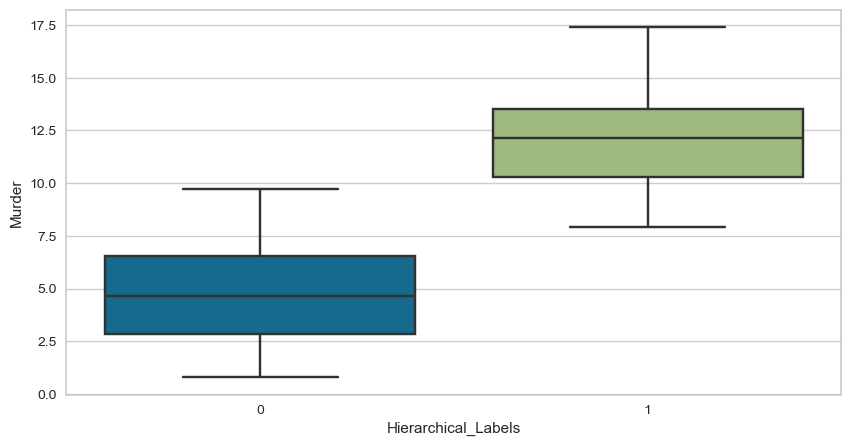

In [194]:

plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Murder', data= crime_df)
plt.show()

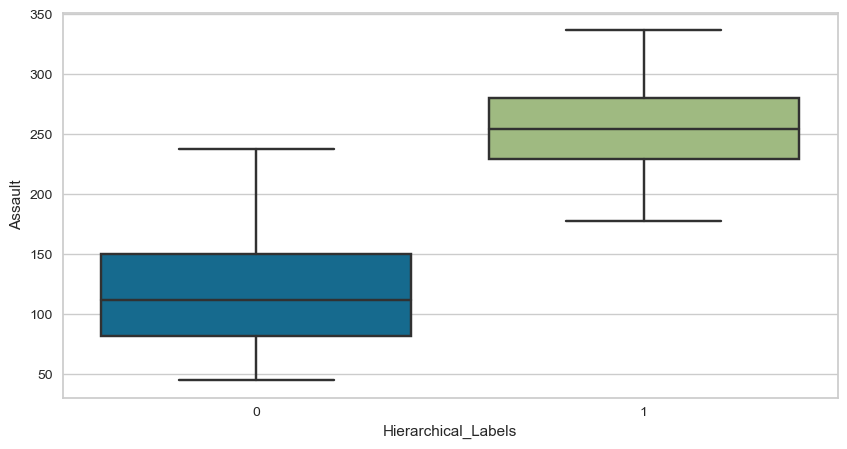

In [195]:

plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Assault', data= crime_df)
plt.show()

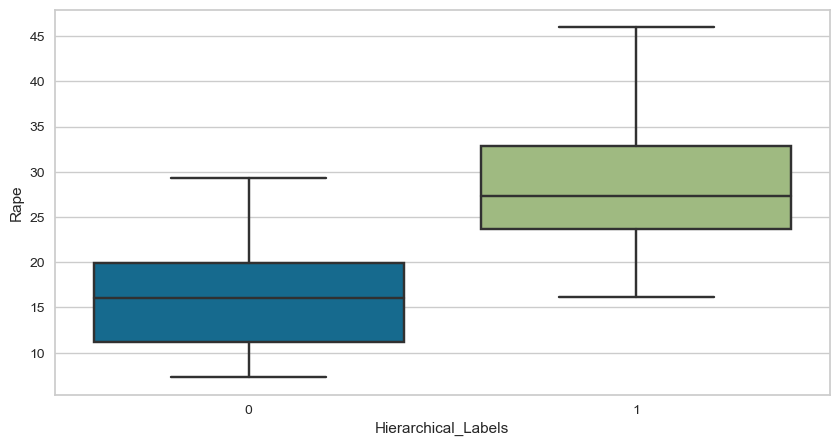

In [196]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Rape', data= crime_df)
plt.show()

In [197]:
# DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

In [198]:
# DBSCAN of Standard Scaled Data
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [199]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_crime)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_crime, DBS_clustering.labels_))
     

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


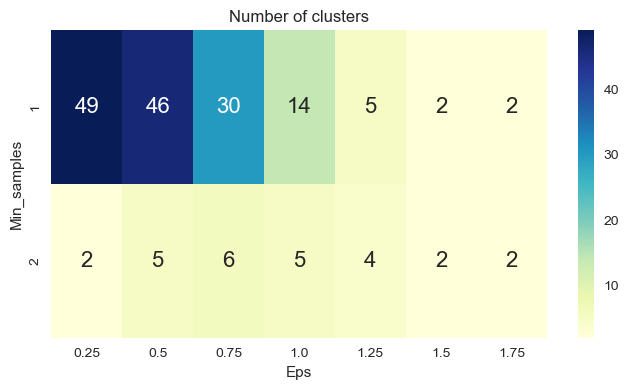

In [200]:
# Collecting number of generated clusters
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

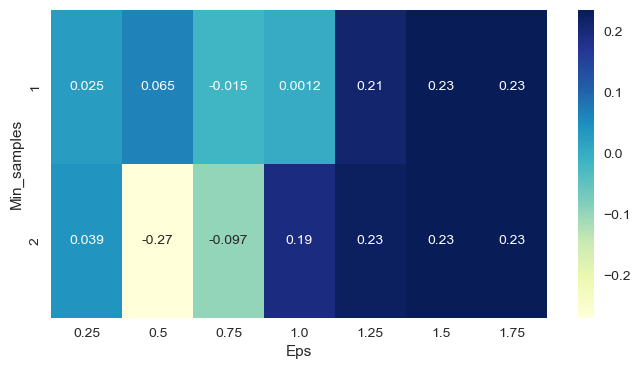

In [201]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [202]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]

sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_crime)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_crime, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])
     

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


In [203]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_crime)

DBSCAN(eps=1.5, min_samples=1)

In [204]:

dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [205]:
# Concating Labels with main dataset copy
crime_df['DBSCAN_Labels'] = dbscan.labels_
crime_df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
states,,,,,,,
0,13.2,236,58,21.2,0,1,0
1,10.0,263,48,44.5,0,1,1
2,8.1,294,80,31.0,0,1,0
3,8.8,190,50,19.5,1,0,0
4,9.0,276,91,40.6,0,1,0


In [206]:

crime_df.groupby('DBSCAN_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.612245,0.387755
1,10.000000,263.000000,48.000000,44.500000,0.000000,1.000000


In [207]:
crime_df.groupby('DBSCAN_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.612245,0.387755
1,10.000000,263.000000,48.000000,44.500000,0.000000,1.000000


In [208]:
# Silhouette Score for DBSCAN

In [209]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(std_crime, dbscan.labels_))
     


Silhouette Coefficient: 0.235


In [210]:
# DBSCAN on MinMax Scaled Data

In [211]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))
     

In [212]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_crime)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_crime, DBS_clustering.labels_))
     

In [213]:
# Collecting number of generated clusters

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


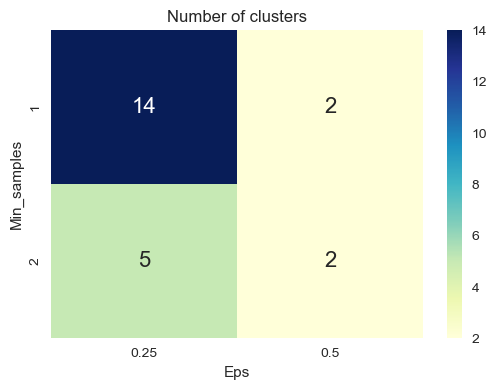

In [214]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()
     

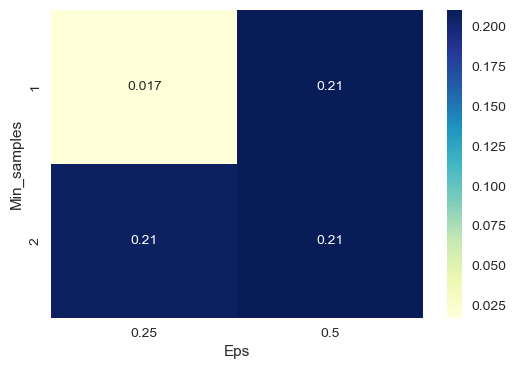

In [215]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [216]:
epsilon = [0.25,0.5]
min_samples = [1,2]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_crime)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_crime, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])
     

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [217]:
# Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [218]:
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(norm_crime)

DBSCAN(min_samples=1)

In [219]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [220]:
# Concating Labels with main dataset copy
crime_df['DBSCAN_Labels'] = dbscan.labels_
crime_df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
states,,,,,,,
0,13.2,236,58,21.2,0,1,0
1,10.0,263,48,44.5,0,1,1
2,8.1,294,80,31.0,0,1,0
3,8.8,190,50,19.5,1,0,0
4,9.0,276,91,40.6,0,1,0


In [221]:
crime_df.groupby('DBSCAN_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.612245,0.387755
1,10.000000,263.000000,48.000000,44.500000,0.000000,1.000000


In [222]:
# Sorting elements based on cluster label assigned and taking average for insights.
cluster1 = pd.DataFrame(crime_df.loc[crime_df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(crime_df.loc[crime_df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_crime = pd.concat([cluster1,cluster2],axis=1)
avg_crime

,Cluster1_Avg,Cluster2_Avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_Label,0.612245,0.0
Hierarchical_Labels,0.387755,1.0
DBSCAN_Labels,0.000000,1.0
